In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

In [155]:
files = glob.glob('../Output/RP/*.csv')
files.sort()
files.append(files.pop(files.index('../Output/RP/Clustering_fit_time.csv')))

In [156]:
files = dict(enumerate(files))
files
#len(files)

{0: '../Output/RP/BreastC Silhouette.csv',
 1: '../Output/RP/BreastC acc.csv',
 2: '../Output/RP/BreastC adjMI.csv',
 3: '../Output/RP/BreastC2D.csv',
 4: '../Output/RP/CreditCardF Silhouette.csv',
 5: '../Output/RP/CreditCardF acc.csv',
 6: '../Output/RP/CreditCardF adjMI.csv',
 7: '../Output/RP/CreditCardF2D.csv',
 8: '../Output/RP/SSE.csv',
 9: '../Output/RP/logliklihood.csv'}

In [157]:
dfs = defaultdict(int)
for indx, f in files.items():
    dfs[indx] = pd.read_csv(f)

In [158]:
time_file="../Clustering_fit_time_RP.csv"
dfs[10]=pd.read_csv(time_file)
print(dfs[10].head(10))

   Unnamed: 0   k  BC_kmean     BC_em  CCF_kmean    CCF_em
0           0   2  0.111573  0.004403   0.075166  0.005005
1           1   3  0.170068  0.006188   0.067940  0.114688
2           2   4  0.187325  0.010428   0.068269  0.045870
3           3   5  0.243073  0.012047   0.139521  0.047692
4           4   6  0.219328  0.019415   0.083982  0.193931
5           5   7  0.228909  0.026504   0.077362  0.195134
6           6   8  0.250636  0.020102   0.078055  0.157135
7           7   9  0.286671  0.034024   0.091755  0.148110
8           8  10  0.249913  0.032998   0.114819  0.087143


In [159]:
fit_time=dfs[10]
fit_time.columns=["-","k","BC_kmean","BC_EM", "CCF_kmean", "CCF_EM"]
bc_kmean_fit_time= fit_time["BC_kmean"]
bc_em_fit_time= fit_time["BC_EM"]
ccf_kmean_fit_time= fit_time["CCF_kmean"]
ccf_em_fit_time= fit_time["CCF_EM"]
cluster_number= fit_time["k"]

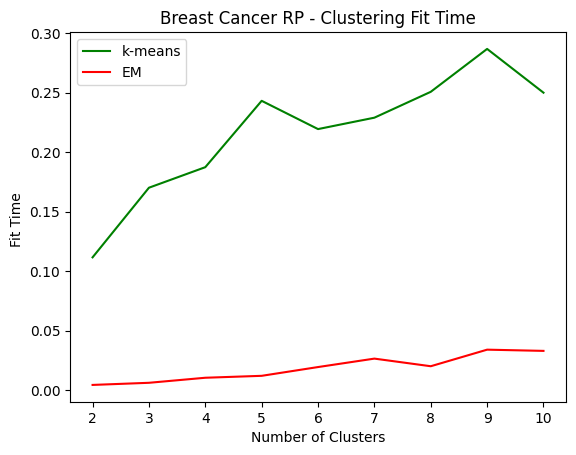

In [192]:
plt.plot(cluster_number,bc_kmean_fit_time, color="green", label= "k-means")
plt.plot(cluster_number,bc_em_fit_time, color="red", label="EM")

plt.ylabel("Fit Time ")
plt.xlabel("Number of Clusters")
plt.legend()
plt.title('Breast Cancer RP - Clustering Fit Time')
plt.savefig('Breast Cancer RP - Clustering Fit Time')

plt.show()

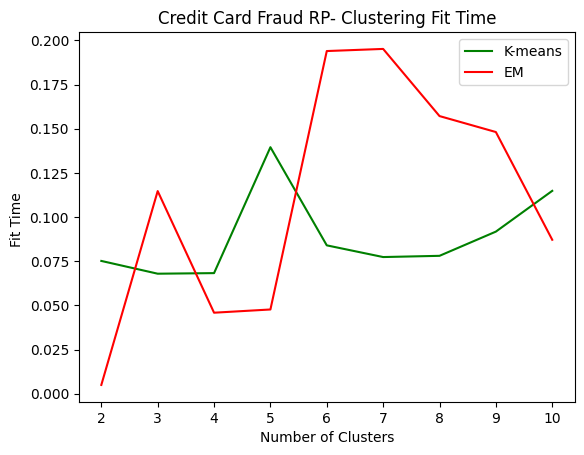

In [161]:
plt.plot(cluster_number,ccf_kmean_fit_time, color="green", label="K-means")
plt.plot(cluster_number,ccf_em_fit_time, color="red", label= "EM")

plt.ylabel("Fit Time ")
plt.xlabel("Number of Clusters")
plt.legend()
plt.title('Credit Card Fraud RP- Clustering Fit Time')
plt.savefig('Credit Card Fraud RP- Clustering Fit Time')

plt.show()

## Part 1: Clustering Analyses

K-means SSE - Both datasets:  **dfs[8]**

GMM Loglikelihood - Both datasets:  **dfs[9]**

Silhouette - BreastC:  **dfs[0]** 

acc - BreastC:  **dfs[1]**

adjMI - BreastC:  **dfs[2]**

Visualize dataset in 2D - Breast C:  **dfs[3]**

Silhouette - Faults:  **dfs[4]** 

acc - Faults:  **dfs[5]**

adjMI - Faults:  **dfs[6]**

Visualize dataset in 2D - Faults:  **dfs[7]**

In [162]:
km_SSE = dfs[8]
gmm_log = dfs[9]
bc_ss = dfs[0].T[1:]
bc_ari = dfs[1].T[1:]
bc_NMI = dfs[2].T[1:]
bc_2d = dfs[3]

ccf_ss = dfs[4].T[1:]
ccf_ari = dfs[5].T[1:]
ccf_NMI = dfs[6].T[1:]
ccf_2d = dfs[7]

# Choosing K
## K-Means SSE: (Breast Cancer & Faulty Plates)

In [163]:
km_SSE.columns = ['clusters','ccf_sse','bc_sse']
x = km_SSE['clusters']
bc_y = km_SSE['bc_sse']
ccf_y = km_SSE['ccf_sse']
km_SSE.head()

,clusters,ccf_sse,bc_sse
0,2,3474.354235,2868.729029
1,3,2853.159155,2494.883018
2,4,2423.310857,2259.091783
3,5,2118.357125,2054.444807
4,6,1985.029055,1935.990365


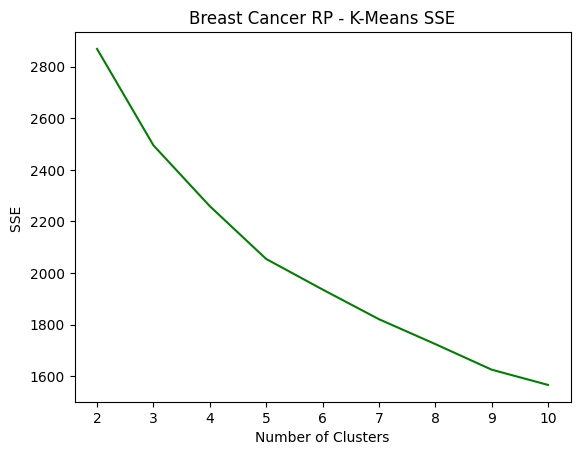

In [164]:
plt.plot(x,bc_y, color="green")
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RP - K-Means SSE')
plt.savefig('Breast Cancer RP - K-Means SSE')


plt.show()

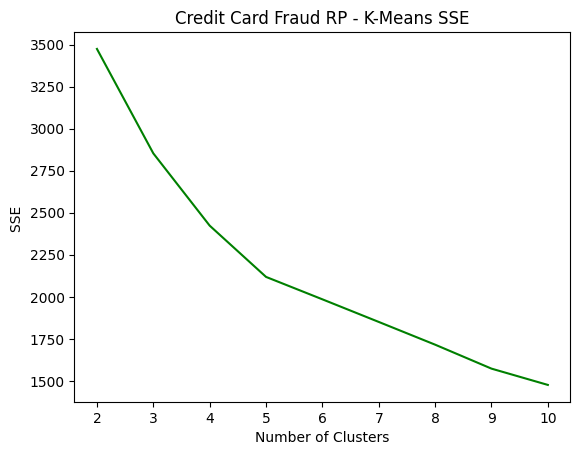

In [165]:
plt.plot(x,ccf_y, color="green")
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud RP - K-Means SSE')
plt.savefig('Credit Card Fraud RP - K-Means SSE')


plt.show()

## EM Log-Likelihood: (Breast Cancer & Faulty Plates)

In [166]:
gmm_log.columns = ['clusters','ccf_sse','bc_log']
x = gmm_log['clusters']
bc_y = gmm_log['bc_log']
ccf_y = gmm_log['ccf_sse']
gmm_log.head()

,clusters,ccf_sse,bc_log
0,2,-6.940435,-8.805001
1,3,-6.191831,-8.635326
2,4,-6.184738,-8.300018
3,5,-5.767277,-8.110684
4,6,-5.689650,-8.023126


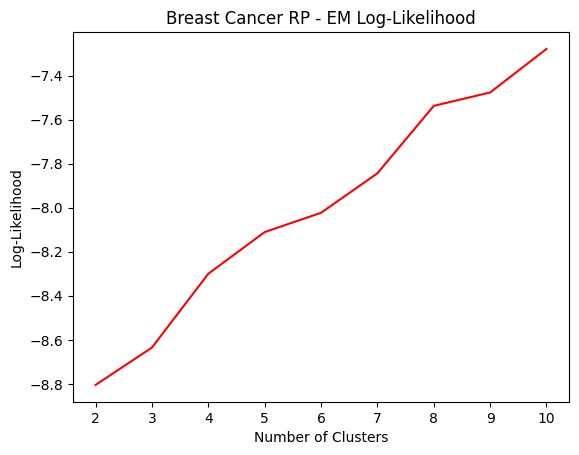

In [167]:
plt.plot(x,bc_y, color= "red")
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RP - EM Log-Likelihood')
plt.savefig('Breast Cancer RP - EM Log-Likelihood')


plt.show()

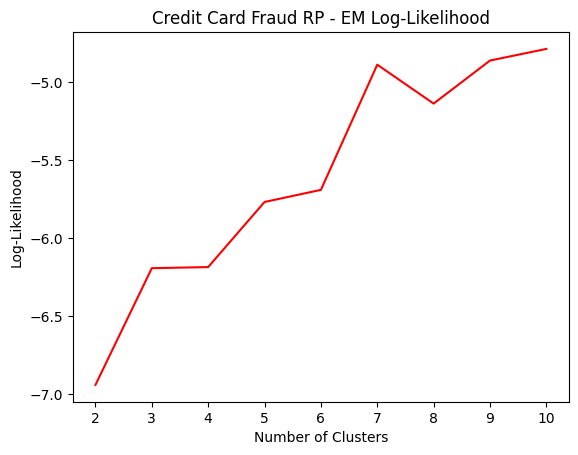

In [168]:
plt.plot(x,ccf_y, color="red")
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud RP - EM Log-Likelihood')
plt.savefig('Credit Card Fraud RP - EM Log-Likelihood')


plt.show()

# Breast Cancer Dataset

## Silhouette Score: K-Means and EM

In [169]:
bc_ss['clusters'] = bc_ss.index
bc_ss.columns = ['gmm_ss','km_ss','clusters']
x = bc_ss['clusters']
gmm_y = bc_ss['gmm_ss']
km_y = bc_ss['km_ss']
bc_ss.head()

,gmm_ss,km_ss,clusters
2,0.265745,0.275388,2
3,0.155628,0.224171,3
4,0.06131,0.164427,4
5,0.08575,0.169873,5
6,0.009516,0.161757,6


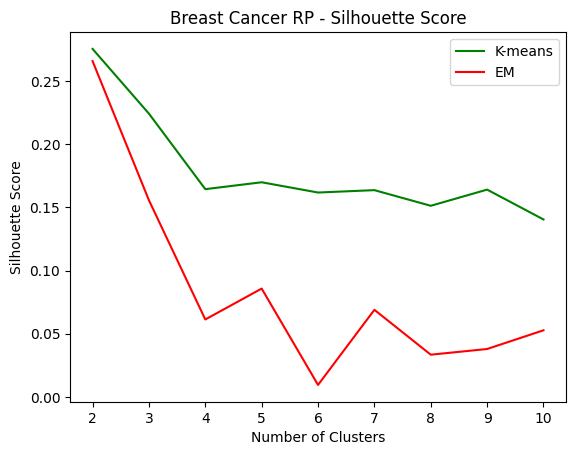

In [170]:
plt.plot(x,km_y, label="K-means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RP - Silhouette Score')
plt.legend()
plt.savefig('Breast Cancer RP - Silhouette Score')


plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [171]:
bc_ari['clusters'] = bc_ari.index
bc_ari.columns = ['gmm_ari','km_ari','clusters']
x = bc_ari['clusters']
gmm_y = bc_ari['gmm_ari']
km_y = bc_ari['km_ari']
bc_ari.head()

,gmm_ari,km_ari,clusters
2,0.14889,0.326002,2
3,0.294686,0.364487,3
4,0.20054,0.288675,4
5,0.49627,0.424176,5
6,0.514805,0.382561,6


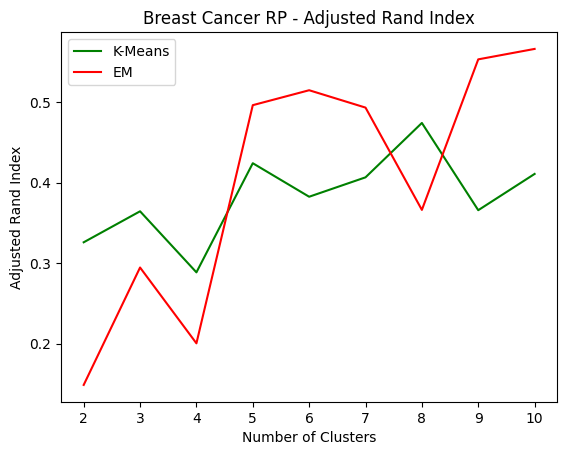

In [172]:
plt.plot(x,km_y, label = "K-Means", color="green")
plt.plot(x,gmm_y, label = "EM", color="red")
plt.ylabel("Adjusted Rand Index")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RP - Adjusted Rand Index')

plt.legend()
plt.savefig('Breast Cancer RP - Adjusted Rand Score')


plt.show()

## Adjusted MI: K-Means and EM

In [173]:
bc_NMI['clusters'] = bc_NMI.index
bc_NMI.columns = ['gmm_NMI','km_NMI','clusters']
x = bc_NMI['clusters']
gmm_y = bc_NMI['gmm_NMI']
km_y = bc_NMI['km_NMI']

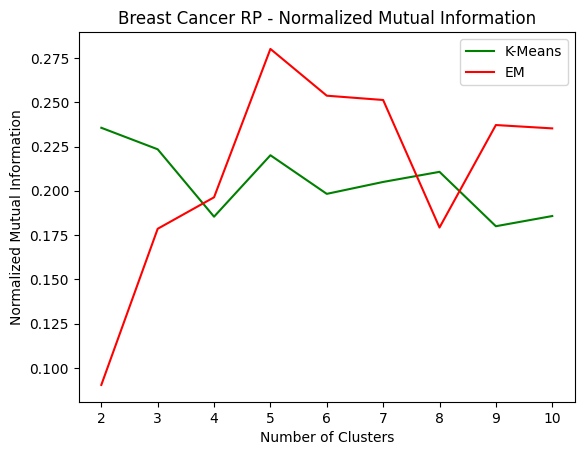

In [174]:
plt.plot(x,km_y, label="K-Means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Normalized Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RP - Normalized Mutual Information')
plt.legend()
plt.savefig('Breast Cancer RP - Normalized Mutual Information')


plt.show()

# Credit Card Fraud Dataset

## Silhouette Score: K-Means and EM

In [175]:
ccf_ss['clusters'] = bc_ss.index
ccf_ss.columns = ['gmm_ss','km_ss','clusters']
x = ccf_ss['clusters']
gmm_y = ccf_ss['gmm_ss']
km_y = ccf_ss['km_ss']
ccf_ss.head()

,gmm_ss,km_ss,clusters
2,0.434453,0.487006,2
3,0.248592,0.431773,3
4,0.241566,0.286401,4
5,0.22311,0.21567,5
6,0.065801,0.209761,6


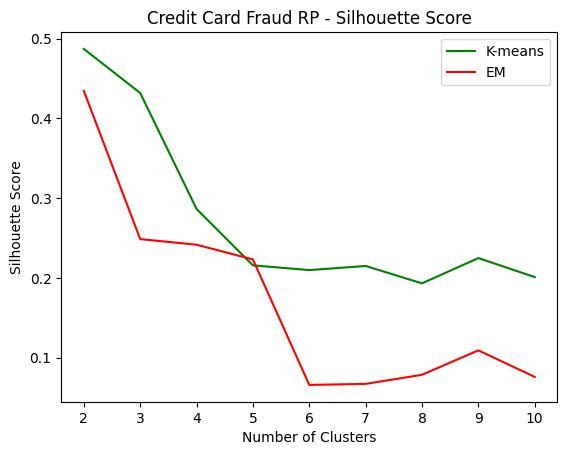

In [176]:
plt.plot(x,km_y, label="K-means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud RP - Silhouette Score')
plt.legend()
plt.savefig('Credit Card Fraud RP - Silhouette Score')


plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [177]:
ccf_ari['clusters'] = ccf_ari.index
ccf_ari.columns = ['gmm_ari','km_ari','clusters']
x = ccf_ari['clusters']
gmm_y = ccf_ari['gmm_ari']
km_y = ccf_ari['km_ari']
ccf_ari.head()

,gmm_ari,km_ari,clusters
2,0.176181,0.114462,2
3,0.642401,0.226329,3
4,0.602243,0.536977,4
5,0.642395,0.424252,5
6,0.630228,0.529541,6


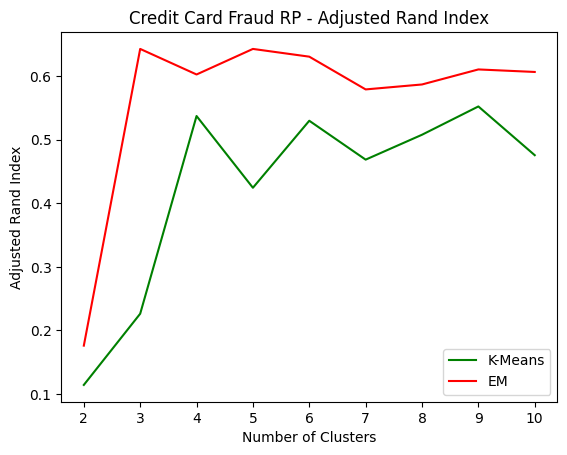

In [178]:
plt.plot(x,km_y, label = "K-Means", color="green")
plt.plot(x,gmm_y, label = "EM", color="red")
plt.ylabel("Adjusted Rand Index")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud RP - Adjusted Rand Index')
plt.legend()
plt.savefig('Credit Card Fraud RP - Adjusted Rand Index')


plt.show()

## Adjusted MI: K-Means and EM

In [179]:
ccf_NMI['clusters'] = ccf_NMI.index
ccf_NMI.columns = ['gmm_NMI','km_NMI','clusters']
x = ccf_NMI['clusters']
gmm_y = ccf_NMI['gmm_NMI']
km_y = ccf_NMI['km_NMI']

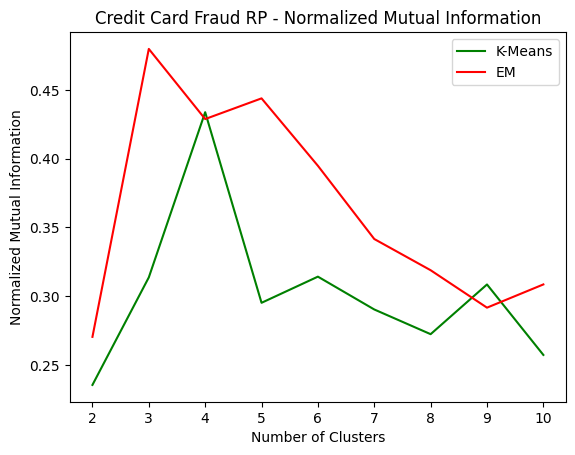

In [180]:
plt.plot(x,km_y, label="K-Means", color="green")
plt.plot(x,gmm_y, label="EM", color="red")
plt.ylabel("Normalized Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Credit Card Fraud RP - Normalized Mutual Information')
plt.legend()
plt.savefig('Credit Card Fraud RP - Normalized Mutual Information')


plt.show()

## 2D Visualizaion

In [181]:
f_2d.columns = ['data','x','y','target']
f_2d.head()

,data,x,y,target
0,0,-2.040459,-5.934886,1.0
1,1,1.134287,20.475073,0.0
2,2,4.831918,-9.154753,1.0
3,3,-0.565495,23.354038,0.0
4,4,25.537819,-1.330111,1.0


## RP Analyses: Pariwise Distance Correlation and Reconstruction Error

In [182]:
files1 = glob.glob('../Output/RP/RP/*1.csv')
files1.sort()
files2 = glob.glob('../Output/RP/RP/*2.csv')
files2.sort()

In [183]:
files1 = dict(enumerate(files1))
files1

{0: '../Output/RP/RP/bc scree1.csv', 1: '../Output/RP/RP/ccf scree1.csv'}

In [184]:
files2 = dict(enumerate(files2))
files2

{0: '../Output/RP/RP/bc scree2.csv', 1: '../Output/RP/RP/ccf scree2.csv'}

In [185]:
dfs1 = defaultdict(int)
for indx, f in files1.items():
    dfs1[indx] = pd.read_csv(f)
    
dfs2 = defaultdict(int)
for indx, f in files2.items():
    dfs2[indx] = pd.read_csv(f)

In [186]:
bc_cor = dfs1[0]
bc_cor["avg_corr"] = dfs1[0].iloc[:,1:11].mean(axis=1)
bc_cor.rename(columns={bc_cor.columns[0]: "components" },inplace=True)
bc_cor[:1]

,components,0,1,2,3,4,5,6,7,8,9,avg_corr
0,2,0.517038,0.722156,0.778437,0.761988,0.774395,0.698166,0.601837,0.589125,0.487414,0.632175,0.656273


In [187]:
bc_rer = dfs2[0]
bc_rer["avg_rerror"] = dfs2[0].iloc[:,1:11].mean(axis=1)
bc_rer.rename(columns={bc_rer.columns[0]: "components" },inplace=True)
bc_rer[:1]

,components,0,1,2,3,4,5,6,7,8,9,avg_rerror
0,2,0.959267,0.837987,0.895503,0.89497,0.920468,0.92835,0.965863,0.969076,0.963287,0.921931,0.92567


In [188]:
ccf_cor = dfs1[1]
ccf_cor["avg_corr"] = dfs1[1].iloc[:,1:11].mean(axis=1)
ccf_cor.rename(columns={ccf_cor.columns[0]: "components" },inplace=True)
ccf_cor[:1]

,components,0,1,2,3,4,5,6,7,8,9,avg_corr
0,2,0.706318,0.650636,0.71799,0.526374,0.701738,0.680779,0.774294,0.775944,0.653978,0.594364,0.678242


In [189]:
ccf_rer = dfs2[1]
ccf_rer["avg_rerror"] = dfs2[1].iloc[:,1:11].mean(axis=1)
ccf_rer.rename(columns={ccf_rer.columns[0]: "components" },inplace=True)
ccf_rer[:1]

,components,0,1,2,3,4,5,6,7,8,9,avg_rerror
0,2,0.934734,0.965175,0.915949,0.954484,0.941544,0.918055,0.915569,0.92093,0.939404,0.95212,0.935796


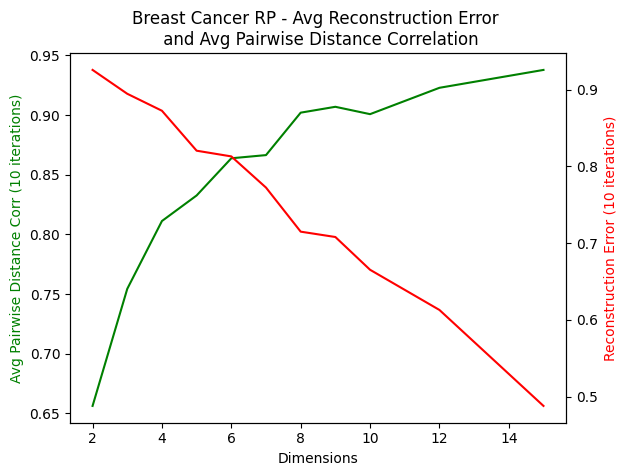

In [190]:
x = bc_cor["components"]
y = bc_cor["avg_corr"]
z = bc_rer["avg_rerror"]


fig, ax = plt.subplots()


ax.plot(x,y, color="green")
ax.set_ylabel("Avg Pairwise Distance Corr (10 iterations)", color="green")
ax.set_xlabel("Dimensions")

ax2=ax.twinx()
ax2.plot(x,z, color="red")
ax2.set_ylabel("Reconstruction Error (10 iterations)", color="red")

plt.title('Breast Cancer RP - Avg Reconstruction Error \n and Avg Pairwise Distance Correlation')
plt.savefig('Breast Cancer RP - Avg Reconstruction Error and Avg Pairwise Distance Correlation')


plt.show()


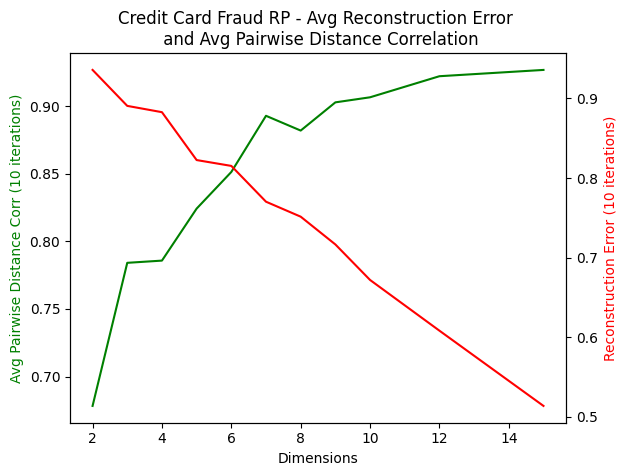

In [191]:
x = ccf_cor["components"]
y = ccf_cor["avg_corr"]
z = ccf_rer["avg_rerror"]


fig, ax = plt.subplots()


ax.plot(x,y, color="green")
ax.set_ylabel("Avg Pairwise Distance Corr (10 iterations)", color="green")
ax.set_xlabel("Dimensions")

ax2=ax.twinx()
ax2.plot(x,z, color="red")
ax2.set_ylabel("Reconstruction Error (10 iterations)", color="red")

plt.title('Credit Card Fraud RP - Avg Reconstruction Error \n and Avg Pairwise Distance Correlation')
plt.savefig('Credit Card Fraud RP - Avg Reconstruction Error and Avg Pairwise Distance Correlation')


plt.show()